In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
# Loading data
# weather.csv contains F1 weather data from 2018 - 2023

feature_categories = [1,2,3,4,6,7]
features = pd.read_csv("weather.csv", usecols=feature_categories)
target = pd.read_csv("weather.csv", usecols=['TrackTemp'])
test_features = pd.read_csv("weather_2024.csv", usecols=feature_categories)
test_target = pd.read_csv("weather_2024.csv", usecols=['TrackTemp'])

In [3]:
# Checking if data loaded

print(features.head())
print(target.head())

   AirTemp  Humidity  Pressure  Rainfall  WindDirection  WindSpeed
0     24.1      36.2     997.1     False            294        3.0
1     24.0      36.3     997.1     False            273        1.4
2     24.0      36.3     997.1     False            273        1.4
3     23.9      37.2     997.0     False            287        2.3
4     24.2      35.8     997.1     False            309        3.5
   TrackTemp
0       38.2
1       38.6
2       38.6
3       38.7
4       38.7


In [4]:
# Converting pandas format to numpy / Assigning m & n

x_train = features.to_numpy()
# x_train[:,3] = x_train[:,3].astype(float) # converts the type of the entire column
# x_train[:,4] = x_train[:,4].astype(float)
x_train = x_train.astype(float)
x_train[:,1] = np.round(x_train[:,1])   #Just to convert humidity to whole number cuz testing data consists of integers
y_train = target.to_numpy()

x_test_raw = test_features.to_numpy()
x_test_raw = x_test_raw.astype(float)
y_test = test_target.to_numpy()

In [5]:
# Checking

print(type(x_train))
print(type(y_train))
print(x_train.dtype)
print(x_train.shape)
print(y_train.shape)
print(y_train[:5])
print()
print(type(x_test_raw))
print(type(y_test))
print(x_test_raw.dtype)
print(x_test_raw.shape)
print(y_test.shape)
print(y_test[:5])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float64
(18214, 6)
(18214, 1)
[[38.2]
 [38.6]
 [38.6]
 [38.7]
 [38.7]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float64
(25668, 6)
(25668, 1)
[[23.8]
 [23.8]
 [23.8]
 [23.7]
 [23.5]]


In [6]:
print("Training Data")
print("-------------")
print("Mean:", np.mean(y_train))
print("Std Dev:", np.std(y_train))
print("Min:", np.min(y_train))
print("Max:", np.max(y_train))
print()
print("Testing Data")
print("------------")
print("Mean:", np.mean(y_test))
print("Std Dev:", np.std(y_test))
print("Min:", np.min(y_test))
print("Max:", np.max(y_test))

Training Data
-------------
Mean: 35.36093115186121
Std Dev: 9.443176757529569
Min: 13.8
Max: 67.0

Testing Data
------------
Mean: 36.24066152407667
Std Dev: 8.477747117055532
Min: 19.9
Max: 51.3


In [7]:
# Failed attempts at appending x_train with interaction terms for quadratic regression

# x = []
# for i in range(len(x_train)):
#     for j in range(len(x_train)):
#         x.append(x_train[i]*x_train[j])
# x_train.extend(x)
# ^ Wrong ^ Multiplies the entire row with another row. Nah, u gotta do individual elements mate.

# for i in range(m):
#     x = []
#     for j in range(n):
#         for k in range(j,n):
#             x.append(x_train[i,j]*x_train[i,k])
#     x_train[i].extend(x)
# ^ Also wrong ^ Numpy arrays don't have extend() and also they are fixed size: you can't change the length of rows

In [8]:
# Appending x_train with interaction terms for quadratic regression

def add_interaction_terms(x):
    m,n = x.shape
    new_x = []
    for i in range(m):
        temp = []
        for j in range(n):
            for k in range(j,n):
                temp.append(x[i,j]*x[i,k])
        row = np.concatenate([x[i],np.array(temp)])
        new_x.append(row)

    # m,n = x.shape
    # new_x = []
    # for i in range(m):
    #     temp = np.dot(x[i],x[i])
    #     row = np.concatenate([x[i],np.array(temp)])
    #     new_x.append(row)
        
    return np.array(new_x)

In [9]:
x_train = add_interaction_terms(x_train)

In [10]:
# Assigning m and n

m = x_train.shape[0]
n = x_train.shape[1]
#m,n = x_train.shape

In [11]:
# Attempts at defining Z-score normalization (standardization)

# Do I do all in one function or split it into three functions and use the two in z-score? Both work
# def z_score(x):
    
#     mu = np.zeros(n)
#     for j in range(n):
#         sum = 0
#         for i in range(m):
#             sum += x[i][j]
#         mu[j] = sum/m
        
#     sigma = np.zeros(n)
#     for j in range(n):
#         sum = 0
#         for i in range(m):
#             sum += ((x[i][j] - mu[j])**2)
#         sigma[j] = (sum/m)**0.5

#     for j in range(n):
#         for i in range(m):
#             x[i][j] = (x[i][j] - mu[j])/sigma[j]
# ----------------------------------------------------------------------------------
# def mean_array(x):
#     mu = np.zeros(n)
#     for j in range(n):
#         sum = 0
#         for i in range(m):
#             sum += x[i][j]
#         mu[j] = sum/m
#     return mu

# def std_dev(x,mu):
#     sigma = np.zeros(n)
#     for j in range(n):
#         sum = 0
#         for i in range(m):
#             sum += ((x[i][j] - mu[j])**2)
#         sigma[j] = (sum/m)**0.5
#     return sigma
# def z_score(x):
#     mu = mean_array(x)
#     sigma = std_dev(x,mu)
#     for j in range(n):
#         for i in range(m):
#             x[i][j] = (x[i][j] - mu[j])/sigma[j]        

In [12]:
# Defining Z-score normalization (Better and concise way using numpy)
    
# def z_score(x):
#     mu = np.mean(x, axis=0)
#     sigma = np.std(x, axis=0)
#     for j in range(n):
#         for i in range(m):
#             x[i][j] = (x[i][j] - mu[j]) / sigma[j]

# Or even better:
def z_score(x):
    mu = np.mean(x, axis=0) 
    sigma = np.std(x, axis=0)
    sigma_safe = np.where(sigma==0,1,sigma) # Replaces sigma=0 with 1. If not sigma!=0, replaces with sigma(itself) (i.e. nothing happens)
    # mu = np.nanmean(x, axis=0)   # Ignore NaNs for mean # axis=0 means operate column-wise. Go down the rows for each column
    # sigma = np.nanstd(x, axis=0) # Ignore NaNs for std
    # sigma[sigma == 0] = 1  # Prevent division by zero

    x[:] = (x - mu) / sigma_safe # The [:] accesses each element within x and updates it in-place (pretty cool ngl; without all that for i for j stuff)

In [13]:
print(type(x_train))
print(x_train[:5][:5])
z_score(x_train)
print(x_train[:5][:5])

<class 'numpy.ndarray'>
[[2.4100000e+01 3.6000000e+01 9.9710000e+02 0.0000000e+00 2.9400000e+02
  3.0000000e+00 5.8081000e+02 8.6760000e+02 2.4030110e+04 0.0000000e+00
  7.0854000e+03 7.2300000e+01 1.2960000e+03 3.5895600e+04 0.0000000e+00
  1.0584000e+04 1.0800000e+02 9.9420841e+05 0.0000000e+00 2.9314740e+05
  2.9913000e+03 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.6436000e+04
  8.8200000e+02 9.0000000e+00]
 [2.4000000e+01 3.6000000e+01 9.9710000e+02 0.0000000e+00 2.7300000e+02
  1.4000000e+00 5.7600000e+02 8.6400000e+02 2.3930400e+04 0.0000000e+00
  6.5520000e+03 3.3600000e+01 1.2960000e+03 3.5895600e+04 0.0000000e+00
  9.8280000e+03 5.0400000e+01 9.9420841e+05 0.0000000e+00 2.7220830e+05
  1.3959400e+03 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.4529000e+04
  3.8220000e+02 1.9600000e+00]
 [2.4000000e+01 3.6000000e+01 9.9710000e+02 0.0000000e+00 2.7300000e+02
  1.4000000e+00 5.7600000e+02 8.6400000e+02 2.3930400e+04 0.0000000e+00
  6.5520000e+03 3.3600000e+01 1.2960000e+03 3.5895

In [14]:
# Define function to compute cost

def compute_cost(x,y,w,b,lambda_):
    cost = 0
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        #print(f_wb)
        cost += (f_wb - y[i])**2
        # print(cost)
    reg_cost = 0                            #Regularization
    for j in range(n):
        reg_cost += (w[j])**2
    reg_cost *= (lambda_/(2*m))
    J_wb = (cost/(2*m)) + reg_cost                   #Total cost
    return J_wb

In [15]:
# Testing compute cost
lambda_ = 0
w = np.zeros(x_train.shape[1],)
b = 0.0
print(compute_cost(x_train, y_train, w, b,lambda_))

[669.7845196]


In [16]:
# Failed attempt at gradient descent

'''
w = w - alpha*dJ/dw
b = b - alpha*dJ/db

dJ/dw = 1/m sumof(i in range(m)) (f_wb - y[i])x_i_j
dJ/db = 1/m sumof(i in range(m)) (f_wb - y[i])
'''
# def gd(x,y,w,alpha):
# for j in range(n):
#     for i in range(m):
#         f_wb = np.dot(w,x[i])+b
#         w[j] = w[j] - (alpha * (f_wb - y[i]) * x[i][j])
#         b = b - (alpha * (f_wb - y[i]))
# ^^^Absolutely preposterous. Change it completely. Whatever simultaneous update means^^^
# If you can't crack it, check out multiple linear regression lab

'\nw = w - alpha*dJ/dw\nb = b - alpha*dJ/db\n\ndJ/dw = 1/m sumof(i in range(m)) (f_wb - y[i])x_i_j\ndJ/db = 1/m sumof(i in range(m)) (f_wb - y[i])\n'

Gradient descent with regularization:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

Compare this to the gradient of the cost function without regularization:
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$

In [17]:
# Defining gradient descent

def gd(x,y,w,b,alpha,lambda_):
    temp_w = np.zeros(n)
    dj_db = 0
    for j in range(n):
        dj_dw = 0
        for i in range(m):
            f_wb = np.dot(w,x[i]) + b
            dj_dw += ((f_wb - y[i])*x[i][j])
            dj_db += (f_wb - y[i])
        dj_dw/=m
        dj_dw += (lambda_/m)*w[j]                      # gradient descent for regularization
        temp_w[j] = w[j] - alpha * dj_dw[0]            # (You can perhaps update it directly without needing a temp var?)
        w[j] = temp_w[j]
    dj_db/=m
    temp_b = b - alpha * dj_db
    b = temp_b

    return w,b

'''Notes:
f(x) = w1x1 + w2x2 + w3x3 + ...... + b.  That means b is one and the same for the f(x). It's not different for each feature. So you don't have to 
put it in a loop; it'll come outside.

Also, f_wb and y[i] are both numpy arrays. So when you subtract them, it results in an array too. And then you're trying to assign it to a scalar 
only spot (numpy array slots are scalar only unless you assign it otherwise) while it is a vector (a matrix/array). This might throw an error so grab 
the value inside dj_dw and use *that* in the operation. (Strangely, this doesn't affect dj_db because it is assigned to a variable, not a scalar only 
spot like the np array.)

Also, if you look Coursera's implementation, they have done dj_dw = np.zeros((n,)). This will create an array for dj_dw something like this 
[0.0, 0.0, 0.0]. And after that they'll assign w from this array of dj_dw which makes complete sense too. But, what I'm doing is that I'm updating 
only the first element of dj_dw and instantly assigning it to temp_w. That way I don't have to create an array.'''

"Notes:\nf(x) = w1x1 + w2x2 + w3x3 + ...... + b.  That means b is one and the same for the f(x). It's not different for each feature. So you don't have to \nput it in a loop; it'll come outside.\n\nAlso, f_wb and y[i] are both numpy arrays. So when you subtract them, it results in an array too. And then you're trying to assign it to a scalar \nonly spot (numpy array slots are scalar only unless you assign it otherwise) while it is a vector (a matrix/array). This might throw an error so grab \nthe value inside dj_dw and use *that* in the operation. (Strangely, this doesn't affect dj_db because it is assigned to a variable, not a scalar only \nspot like the np array.)\n\nAlso, if you look Coursera's implementation, they have done dj_dw = np.zeros((n,)). This will create an array for dj_dw something like this \n[0.0, 0.0, 0.0]. And after that they'll assign w from this array of dj_dw which makes complete sense too. But, what I'm doing is that I'm updating \nonly the first element of dj_dw

In [18]:
# Training model (by computing cost and doing gradient descent repeatedly)

start_time = time.time()
w = np.zeros(n, dtype=float)
b = 0.0
alpha = 0.05
lambda_ = 0
J_history = []
iterations = 1500

for i in range(iterations+1):
    w,b = gd(x_train,y_train,w,b,alpha,lambda_)

    if i%100 == 0:
        cost = compute_cost(x_train,y_train,w,b,lambda_)
        J_history.append(cost[0])
        print(f"Cost after {i} iterations: {cost}")
        if len(J_history)>1:
            if J_history[-2]-J_history[-1] < 0.01: # The current cost - the previous cost
                break
            
end_time = time.time()
# print("Cost history: ",J_history)
duration = end_time - start_time
print(f"Time elapsed: {round(duration//60)} minutes {round(duration%60)} seconds")

Cost after 0 iterations: [109.88988375]
Cost after 100 iterations: [16.75631373]
Cost after 200 iterations: [16.56064865]
Cost after 300 iterations: [16.45107037]
Cost after 400 iterations: [16.37505212]
Cost after 500 iterations: [16.31458683]
Cost after 600 iterations: [16.26253547]
Cost after 700 iterations: [16.21569924]
Cost after 800 iterations: [16.17245786]
Cost after 900 iterations: [16.13189716]
Cost after 1000 iterations: [16.09345568]
Cost after 1100 iterations: [16.0567655]
Cost after 1200 iterations: [16.02157281]
Cost after 1300 iterations: [15.98769477]
Cost after 1400 iterations: [15.95499447]
Cost after 1500 iterations: [15.92336576]
Time elapsed: 181 minutes 24 seconds


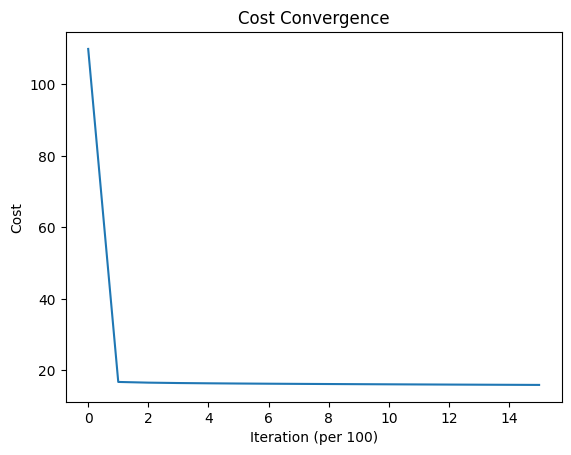

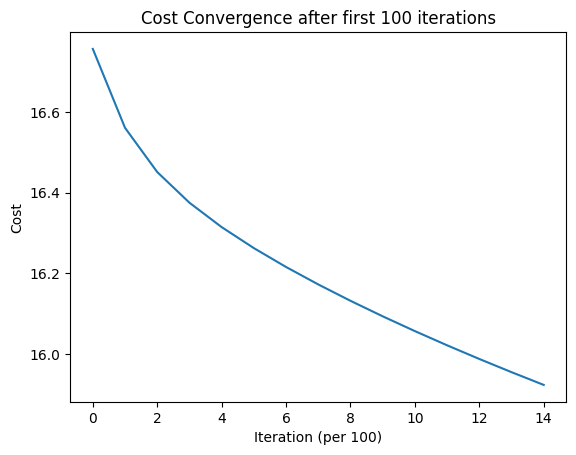

In [19]:
# Thanks GPT -_- . Plotting J_history
plt.plot(J_history)
plt.xlabel("Iteration (per 100)")
plt.ylabel("Cost")
plt.title("Cost Convergence")
plt.show()
plt.plot(J_history[1:])
plt.xlabel("Iteration (per 100)")
plt.ylabel("Cost")
plt.title("Cost Convergence after first 100 iterations")
plt.show()

In [20]:
print(w)

[ 4.80925609e+00  1.03283761e+00  1.00099772e+00 -9.39926604e-02
 -8.38859951e-04 -1.07090367e-01 -2.12988749e+00  3.36369801e-01
  2.83814788e+00 -7.67608621e-01 -1.45473724e+00 -1.02956024e+00
 -3.14616452e+00 -1.96077456e+00  5.93762661e-01  8.82885473e-01
 -1.09650320e-01 -3.81420625e+00  6.20179537e-02  1.72714199e+00
  9.93888331e-01  9.60161293e-03 -2.20281841e-01  3.11173158e-01
 -1.42677510e+00 -1.26454041e-01 -4.56144361e-01]


In [21]:
x_test = add_interaction_terms(x_test_raw)
z_score(x_test)

In [22]:
def predict(m,x):
    predicted = np.zeros(m,dtype=float)
    for i in range(m):
        predicted[i] = np.dot(w,x[i]) + b[0] # Did b[0] cuz b has shape (1,). Can't assign vector to a scalar spot.
    return predicted

In [23]:
# Creating an array of predicted values

predicted_train = predict(m,x_train) # Prediction based on training data

m_test = x_test.shape[0]
predicted_test = predict(m_test,x_test) # Prediction based on testing data

In [24]:
# Defining R^2

# R^2 = 1-(SumOfSquares_Total/SumOfSquares_Residual)
# SumOfSquares_Total = Summation ((target - mean(target))^2)
# SumOfSquares_Residual = Summation ((target - predicted)^2)

def r_square(target,predicted,m):
    sum_sst = 0
    sum_ssr = 0
    mean = np.mean(target,axis=0)
    for i in range(m):
        sum_sst += (target[i] - mean)**2
        sum_ssr += (target[i] - predicted[i])**2
    
    r_sq = 1 - (sum_ssr/sum_sst)
    return r_sq

In [25]:
# Defining RMSE

# Root mean squared error = sqrt(summation[1-N](predicted[i] - actual[i])^2/N)

# def rmse(target,predicted):
#     sum = 0
#     for i in range(m):
#         sum += (predicted[i] - target[i])^2
#     result = (sum/m)**0.5
#     return result

# Better way

def rmse(target,predicted):
    return np.sqrt(np.mean((predicted - target)**2))

In [26]:
print("Training Data")
print("-------------")
print(f"R square: {r_square(y_train,predicted_train,m)}")
print(f"RMSE: {rmse(y_train,predicted_train)}")
print(f"NRMSE: {rmse(y_train,predicted_train)/(np.max(y_train)-np.min(y_train))}")
print()
print("Testing Data")
print("------------")
print(f"R square: {r_square(y_test,predicted_test,m_test)}")
print(f"RMSE: {rmse(y_test,predicted_test)}")
print(f"NRMSE: {rmse(y_test,predicted_test)/(np.max(y_test)-np.min(y_test))}")

Training Data
-------------
R square: [0.64286811]
RMSE: 12.059371978480891
NRMSE: 0.22667992440753554

Testing Data
------------
R square: [0.604389]
RMSE: 11.209911453304171
NRMSE: 0.3570035494682857
